In [1]:
import pandas as pd

# Lese die Daten ein und gebe die ersten fünf Zeilen aus
features = pd.read_csv('temps.csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


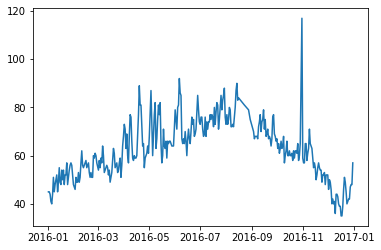

In [3]:
import matplotlib.pyplot as plt

# mache aus Jahr, Monat, Tag ein Datum und plotte den zeitlichen Verlauf von temp_1
plt.plot(pd.to_datetime(features[['year', 'month', 'day']].rename(columns={'year': 'year', 'month': 'month', 'day': 'day'})), features[['temp_1']])

In [4]:
# Encoding der Daten mit Pandas get_dummies
features = pd.get_dummies(features)
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [5]:
import numpy as np

labels = np.array(features['actual'])

# Lösche lables von den features & sichere den Rest
features= features.drop('actual', axis = 1)
feature_list = list(features.columns)

# Speichere features als numpy-Array
features = np.array(features)

In [6]:
# Nutze Skicit-learn um in Trainings- und Testdaten zu teilen
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

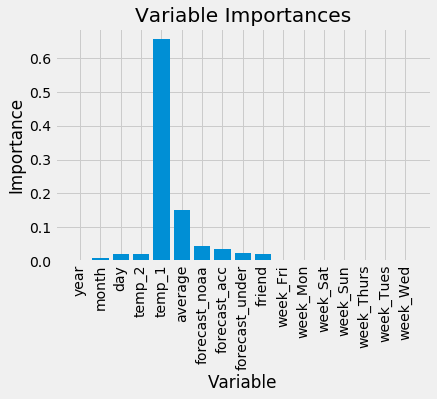

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Instanziere Modell mit 1000 Entscheidungsbäumen & trainiere das Modell
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);# Hole dir die Wichtigkeit der einzelnen Features

predictions = rf.predict(test_features)
importances = list(rf.feature_importances_)

# Plotte diese als Balkendiagramm
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

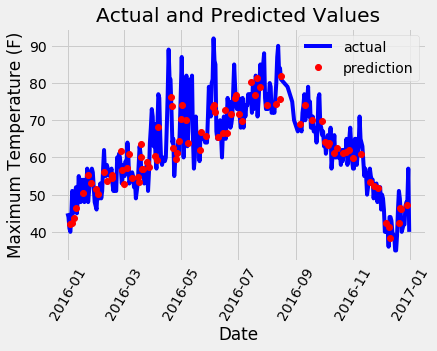

In [10]:
import datetime

# Datums der Trainingsdaten
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

# Konvertiere in Datetime-Objekte
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Datensatz mit "echten" Werten
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Datums der vorhergesagten Daten
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Vorsage-Datensatz
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

# Plotte Vorhersage- und Trainingsdatensatz
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');